# 상품 리뷰 데이터를 이용한 리포트 작성

## 데이터 생성

* 앞서 데이터를 mydata DB안에 dataset2로 저장했다.

## Division별 평점 분포 계산

### 1. Division별 평균 평점 계산

* 분석에 앞서 데이터 세트의 컬럼 구조를 확인한다.
* Division별 평균 Rating을 계산하려면 먼저 Division Name으로 그룹핑한 뒤, 점수를 평균하면 된다.

#### a. Division Name별 평점

In [ ]:
# division name별 평균 평점
SELECT `Division Name`, AVG(Rating) AVG_Rate
FROM dataset2
GROUP BY 1
ORDER BY 2 DESC;

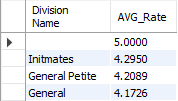

* 3개 Division 모두 유사한 평점을 갖는 것으로 보인다.
* 공란이 있는 부분은 입력값이 없는 것으로 보고 무시하면 될 것이다.

#### b. Department별 평균 평점

In [ ]:
# department별 평균 평점
SELECT 	`Department Name`, AVG(Rating) AVG_Rate
FROM dataset2
GROUP BY 1
ORDER BY 2 DESC;

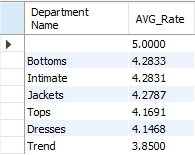

* Bottoms부터 Dresses까지 상위 5개 Department는 유사한 평점을 가진 것으로 보인다.
* Trend는 3.85점으로 상위 5개 Department대비 평점이 매우 낮게 나타나는 것으로 확인된다.
* Trend에 어떤 문제가 있는지 살펴볼 필요가 있다.
* 먼저 Trend의 좋지 않은 리뷰(평점 3점 이하)의 연령별 분포를 살펴본다.
* Department Name을 Trend로 한정하고, Rating은 3점 이하라는 조건을 추가하여 쿼리를 작성하면 된다.

#### c. Trend의 평점 3점 이하 리뷰

In [ ]:
# Trend의 평점 3점 이하 리뷰
SELECT *
FROM dataset2
WHERE `Department Name` = 'Trend' AND Rating <= 3;

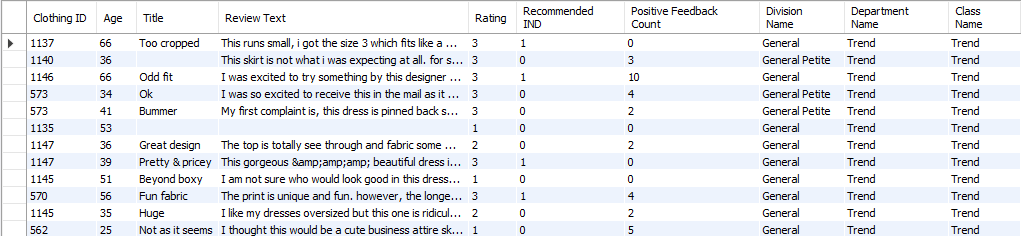

* 쿼리결과를 보면, Rating은 3점 이하이면서 Department Name은 Trend인 데이터가 모두 조회된다.
* 위의 데이터 세트에서 연령으로 데이터를 그룹핑하고 카운트로 집계하면, 우리가 원하는 결과를 도출할 수 있다.

### 2. case when

* 연령을 10세 단위로 그룹핑한다면 다음과 같이 할 수 있다.

In [ ]:
# case when을 이용하여 연령을 10세 단위로 그룹핑
SELECT CASE WHEN Age between 0 and 9 then '0009'
WHEN Age between 10 and 19 then '1019'
WHEN Age between 20 and 29 then '2029'
WHEN Age between 30 and 39 then '3039'
WHEN Age between 40 and 49 then '4049'
WHEN Age between 50 and 59 then '5059'
WHEN Age between 60 and 69 then '6069'
WHEN Age between 70 and 79 then '7079'
WHEN Age between 80 and 89 then '8089'
WHEN Age between 90 and 99 then '9099' END AGEBAND,
AGE
FROM dataset2
WHERE `Department Name` = 'Trend' AND Rating <= 3;

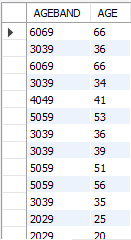

* 위의 방법은 하나씩 연령 구간을 설정해야 한다는 점에서 번거로움이 있다.
* 다음의 FLOOR를 사용하면 10세 단위로 연령을 쉽게 나눌 수 있다.

### 3. FLOOR

* FLOOR: 소수점 첫째 자리에서 버림하는 함수로, 주어진 숫자와 가장 근접한 작은 정수를 출력한다.
* 연령을 10으로 나눈 값을 버림하면 어떤 값을 얻을 수 있는지 확인해본다.
* 예를 들어 23을 10으로 나누면 2.3이라는 값을 얻게 되고, 10을 곱하면 20이라는 값이 계산된다.
* 다른 값도 마찬가지로 57을 10으로 나눈 뒤 소수점을 버림 하면 5라는 값이 되고, 10을 곱한다면 50이라는 값을 얻을 수 있다.

In [ ]:
# floor를 사용하여 연령을 10세 단위로 그룹핑
SELECT FLOOR(Age/10)*10 AGEBAND, AGE
FROM dataset2
WHERE `Department Name` = 'Trend' AND Rating <= 3;

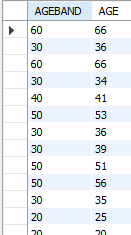

* case when을 사용하는 것보다 훨씬 간단한 방법으로 10세 단위를 나눌 수 있게 되었다.
* 이것을 토대로 데이터를 그룹핑하고 COUNT로 집계한다면 연령별 리뷰 수를 구할 수 있을 것이다.

#### a. Trend의 평점 3점 이하 리뷰의 연령 분포

In [ ]:
# Trend의 평점 3점 이하 리뷰의 연령 분포
SELECT FLOOR(Age/10)*10 AGEBAND, COUNT(*) CNT
FROM dataset2
WHERE `Department Name` = 'Trend' AND Rating <= 3
GROUP BY 1
ORDER BY 2 DESC;

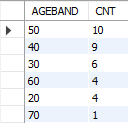

* 50대에서 3점 이하의 평점 수가 가장 많은 것으로 확인된다.
* 그렇다고 50대가 Trend라는 Department에 가장 많은 불만이 있는가를 판단하기 위해서는 추가로 Trend 전체 연령별 리뷰 수를 구해보아야 한다.

#### b. Department별 연령별 리뷰 수

In [ ]:
# Trend의 전체 연령별 리뷰 수 분포
SELECT FLOOR(Age/10)*10 AGEBAND, COUNT(*) CNT
FROM dataset2
WHERE `Department Name` = 'Trend'
GROUP BY 1
ORDER BY 2 DESC;

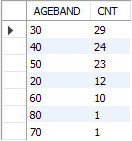

* Trend의 전체 리뷰 수를 보면 30, 40, 50대 순으로 리뷰 수가 많은 것으로 확인된다.
* 이를 종합해 보면, 50대의 Trend에 대한 평점이 다소 좋지 못한 것으로 생각할 수 있다.
* 연령별 3점 이하의 리뷰 수를 비중으로 구한다면, 더 명확하게 결과를 확인할 수 있다.

#### c. 50대 3점 이하 Trend 리뷰

In [ ]:
# 50대 3점 이하 Trend 리뷰
SELECT *
FROM dataset2
WHERE `Department Name` = 'Trend' AND Rating <= 3
AND Age between 50 and 59 LIMIT 10;

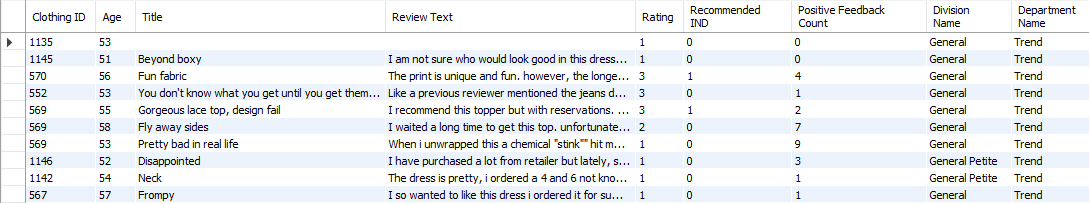

* 리뷰를 살펴보면, 사이즈에 관한 complain이 존재함을 알 수 있다.
* 추후 사이즈와 관련된 리뷰를 좀 더 깊게 살펴볼 필요가 있다.

## 평점이 낮은 상품의 주요 Complain

* Department별로 평점이 낮은 주요 10개 상품을 조회한 후, 해당 상품들의 리뷰를 살펴본다.
* Department별 평점이 낮은 10개 상품을 임시 테이블로 생성한다.

### 1. Department Name, Clothing Name별 평균 평점 계산

In [ ]:
# Department Name, Clothing Name별 평균 평점 계산
SELECT `Department Name`, `Clothing ID`, AVG(Rating) AVG_Rate
FROM dataset2
GROUP BY 1, 2;

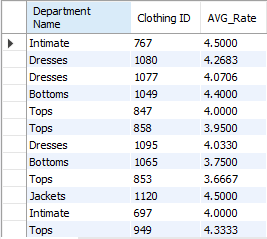

### 2. Department별 순위 생성

* Department, Clothing id의 평균 평점을 계산하고, Department 내에서 평균 평점을 기준으로 순위를 매긴다.

In [ ]:
# Department별 순위 생성
SELECT *, ROW_NUMBER() OVER(PARTITION BY `Department Name` ORDER BY AVG_Rate) RNK
FROM
(SELECT `Department Name`, `Clothing ID`, AVG(Rating) AVG_Rate
FROM dataset2
GROUP BY 1, 2) A; 

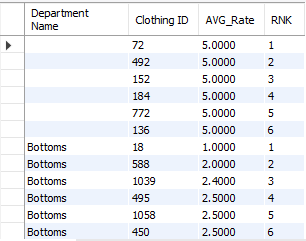

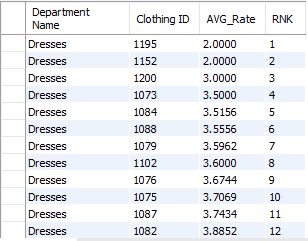

* 각 Department별로 평점이 가장 낮은 순서대로 순위가 매겨짐을 볼 수 있다.
* 해당 데이터 세트에서 RNK값이 1~10위 사이인 데이터를 가지고 오면, 각 Department별로 평점이 좋지 않은 10개 상품을 조회할 수 있다.

### 3. 1~10위 데이터 조회

In [ ]:
# 1~10위 데이터 조회
SELECT *
FROM
(SELECT *, ROW_NUMBER() OVER(PARTITION BY `Department Name` ORDER BY AVG_Rate) RNK
FROM
(SELECT `Department Name`, `Clothing ID`, AVG(Rating) AVG_Rate
FROM dataset2
GROUP BY 1, 2) A) A
WHERE RNK <= 10;

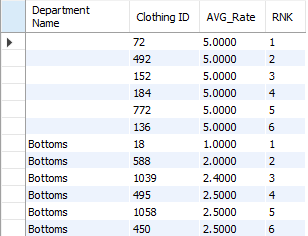

#### a. Department별 평균 평점이 낮은 10개 상품

In [ ]:
# Department별 평균 평점이 낮은 10개 상품데이터를 테이블로 생성
CREATE TEMPORARY TABLE stat AS
SELECT *
FROM
(SELECT *, ROW_NUMBER() OVER(PARTITION BY `Department Name` ORDER BY AVG_Rate) RNK
FROM
(SELECT `Department Name`, `Clothing ID`, AVG(Rating) AVG_Rate
FROM dataset2
GROUP BY 1, 2) A) A
WHERE RNK <= 10;

* 생성한 테이블을 이용하면, 각 Department별로 평점이 낮은 상품들의 Complain 내용을 확인할 수 있다.
* 예를 들어, Bottoms의, 평점이 낮은 10개 상품의 리뷰를 조회할 때, 다음의 쿼리를 실행하면 Bottoms의 평점이 낮은 10개 상품의 Clothing ID를 조회할 수 있다.

In [ ]:
# Bottoms의 평점이 낮은 10개 상품의 Clothing ID를 조회
SELECT `Clothing ID`
FROM stat
WHERE `Department Name` = 'Bottoms';

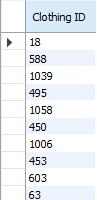

* 위의 Clothing ID에 해당하는 리뷰 내용을 조회하는 방법은 다음과 같다.

In [ ]:
# Clothing ID에 해당하는 리뷰 내용을 조회
SELECT *
FROM dataset2
WHERE `Clothing ID` IN
(SELECT `Clothing ID` FROM stat
WHERE `Department Name` = 'Bottoms')
ORDER BY `Clothing ID`;

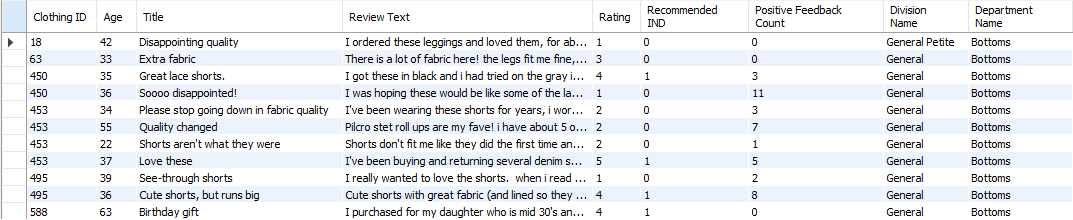

#### b.TF-IDF

* 리뷰 데이터는 수많은 단어로 구성되어 있다.
* 문단에는 the, product와 같이 자주 사용되지만 가치가 없는 단어들도 있고, Size, Textured와 같이 평가 내용을 파악하는데 도움이 되는 가치 있는 단어들도 있다.
* 이를 판단하기 위해 NLP(Natural Language Processing)에서 TF-IDF라는 Score를 이용해 단어별로 가치 수준을 측정할 수 있다.
* TF-IDF는 R, Python을 통해 계산할 수 있다.

## 연령별 Worst Department

* 리뷰 데이터를 기반으로 프로모션을 진행한다고 가정해본다.
* 먼저 연령대별로 가장 낮은 점수를 준 Department를 구하고, 해당 Department의 할인 쿠폰을 발송하기로 한다.
* 연령별로 가장 낮은 점수를 준 Department가 구해지면, 연령별로 가장 낮은 점수를 준 Department에 혜택을 준다.
* 이를 구하기 위해선 다음의 과정이 필요하다.

* 연령, Department별 가장 낮은 점수 계산
* 생성한 점수를 기반으로 Rank 생성
* Rank값이 1인 데이터를 조회

* 연령, Department별 가장 낮은 점수를 계산한다.
* Department Name과 연령으로 그룹핑한 뒤, 평점을 평균하면 된다. 이때 연령은 앞에서 구한 것처럼 10세 단위로 나눈다.

In [ ]:
# Department별 가장 낮은 점수를 계산, Department Name과 연령으로 그룹핑한 뒤, 평점을 평균
SELECT `Department Name`, FLOOR(Age/10)*10 AGEBAND,
AVG(Rating) AVG_Rating
FROM dataset2
GROUP BY 1, 2;

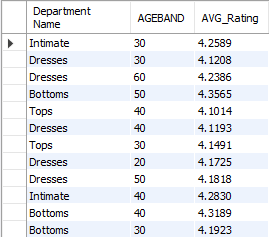

* 다음으로 연령별로 생성한 점수를 기준으로 Rank를 계산한다.
* Rank를 생성할 때는 가장 낮은 점수가 1위가 되도록 오름차순으로 정렬한다.

In [ ]:
SELECT *,
ROW_NUMBER() OVER(PARTITION BY AGEBAND ORDER BY AVG_Rating) RNK
FROM
(SELECT `Department Name`, FLOOR(Age/10)*10 AGEBAND,
AVG(Rating) AVG_Rating
FROM dataset2
GROUP BY 1, 2) A;

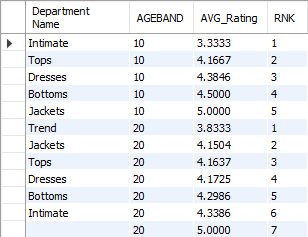

* 연령별로 평균 평점 점수가 가장 낮은 Department가 Rank값 1을 갖게 된다.
* 10대의 가장 낮은 평균 평점을 받은 Department는 Bottoms, 20대의 가장 낮은 평균 평점을 받은 Department는 Trend가 된다.

* Rank값이 1인 값을 조회하면, 연령별로 가장 낮은 평점을 준 Department를 찾을 수 있다.

In [ ]:
# Rank값이 1인 값을 조회
SELECT *
FROM
(SELECT *,
ROW_NUMBER() OVER(PARTITION BY AGEBAND ORDER BY AVG_Rating) RNK
FROM
(SELECT `Department Name`, FLOOR(Age/10)*10 AGEBAND,
AVG(Rating) AVG_Rating
FROM dataset2
GROUP BY 1, 2) A) A
WHERE RNK = 1;

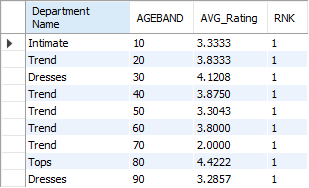

## Size Complain

* Size가 포함된 리뷰의 수를 구하는 방법에는 여러 가지가 있을 수 있다.
* 여기선 CASE WHEN을 이용해본다.

In [ ]:
# Size가 포함된 리뷰의 수를 구하기
SELECT `Review Text`,
CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END SIZE_YN
FROM dataset2;

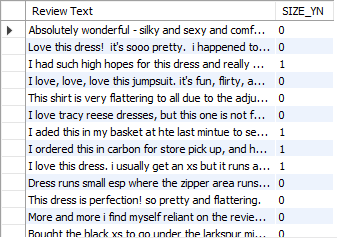

* Review Text는 리뷰의 내용이고, SIZE_YN은 리뷰 내용 중 size가 포함되어 있으면 1, 그렇지 않으면 0인 값이 출력되는 컬럼이다.
* 여기서 SIZE_YN을 더한 값이 Review Text 중 size가 포함된 리뷰의 수가 될 것이다.

In [ ]:
# count(*)를 이용하여 REVIEW Text 중 size가 포함된 리뷰의 수
SELECT sum(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,
COUNT(*) N_TOTAL
FROM dataset2;

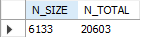

* 사이즈를 Large, Loose, Small, Tight로 상세히 나누어 확인해본다.

In [ ]:
# Large, Loose, Small, Tight로 상세히 나누어 확인
SELECT SUM(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,
SUM(CASE WHEN `Review Text` LIKE '%LARGE%' THEN 1 ELSE 0 END) N_LARGE,
SUM(CASE WHEN `Review Text` LIKE '%LOOSE%' THEN 1 ELSE 0 END) N_LOOSE,
SUM(CASE WHEN `Review Text` LIKE '%SMALL%' THEN 1 ELSE 0 END) N_SMALL,
SUM(CASE WHEN `Review Text` LIKE '%TIGHT%' THEN 1 ELSE 0 END) N_TIGHT,
SUM(1) N_TOTAL
FROM dataset2;

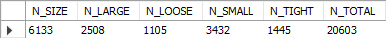

* 카테고리별로 해당 수치 확인

In [ ]:
# 카테고리별로 해당 수치 확인
SELECT `Department Name`,
SUM(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,
SUM(CASE WHEN `Review Text` LIKE '%LARGE%' THEN 1 ELSE 0 END) N_LARGE,
SUM(CASE WHEN `Review Text` LIKE '%LOOSE%' THEN 1 ELSE 0 END) N_LOOSE,
SUM(CASE WHEN `Review Text` LIKE '%SMALL%' THEN 1 ELSE 0 END) N_SMALL,
SUM(CASE WHEN `Review Text` LIKE '%TIGHT%' THEN 1 ELSE 0 END) N_TIGHT,
SUM(1) N_TOTAL
FROM dataset2
GROUP BY 1;

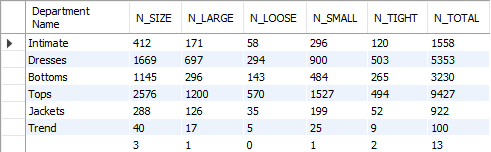

* Dresses, Bottoms, Tops에서 사이즈와 관련된 리뷰가 많은 것으로 확인된다.
* Dresses, Bottoms는 Tops와 비교해 Small, Tight와 관련된 리뷰가 많았다.

* 연령별로 나누어 수치 확인

In [ ]:
# 연령별로 나누어 수치 확인
SELECT FLOOR(Age/10)*10 AGEBAND, `Department Name`,
SUM(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE,
SUM(CASE WHEN `Review Text` LIKE '%LARGE%' THEN 1 ELSE 0 END) N_LARGE,
SUM(CASE WHEN `Review Text` LIKE '%LOOSE%' THEN 1 ELSE 0 END) N_LOOSE,
SUM(CASE WHEN `Review Text` LIKE '%SMALL%' THEN 1 ELSE 0 END) N_SMALL,
SUM(CASE WHEN `Review Text` LIKE '%TIGHT%' THEN 1 ELSE 0 END) N_TIGHT,
SUM(1) N_TOTAL
FROM dataset2
GROUP BY 1, 2
ORDER BY 1, 2;   

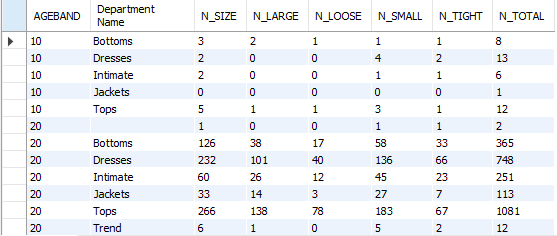

* 단순히 리뷰의 수를 계산하게 되면 Department에서 Size와 관련된 주된 Complain내용이 무엇인지 파악하기 힘들다.
* 절대 수가 아닌 비중을 구한다면 더 직관적으로 Complain의 분포를 파악할 수 있을 것이다.

* 총 리뷰 수로 각 컬럼을 나누면, 각 그룹에서 size 세부 그룹의 비중을 구할 수 있다.

In [ ]:
# 세부 그룹의 비중을 구하기
SELECT FLOOR(Age/10)*10 AGEBAND, `Department Name`,
SUM(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) / SUM(1) N_SIZE,
SUM(CASE WHEN `Review Text` LIKE '%LARGE%' THEN 1 ELSE 0 END) / SUM(1) N_LARGE,
SUM(CASE WHEN `Review Text` LIKE '%LOOSE%' THEN 1 ELSE 0 END) / SUM(1) N_LOOSE,
SUM(CASE WHEN `Review Text` LIKE '%SMALL%' THEN 1 ELSE 0 END) / SUM(1) N_SMALL,
SUM(CASE WHEN `Review Text` LIKE '%TIGHT%' THEN 1 ELSE 0 END) / SUM(1) N_TIGHT,
SUM(1) N_TOTAL
FROM dataset2
GROUP BY 1, 2

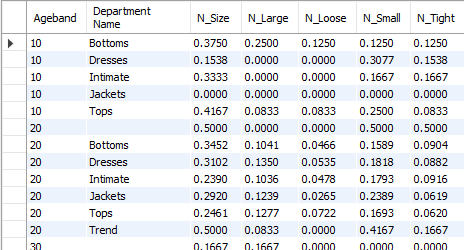

* 총 리뷰 수를 SUM(1)과 같은 방법으로 계산했는데, 이는 COUNT(*)과 동일한 결과를 출력한다.
* COUNT(*)은 데이터 ROW의 개수를 구하는 집계 함수였다. SUM(1)은 ROW마다 1이라는 수를 생성하고, 이를 모두 합한 결과를 의미
* 결론적으로 COUNT(*)과 SUM(1)은 동일한 결과를 출력하게 된다.

## Clothing ID별 Size Review

* 어떤 상품이 Size와 관련된 리뷰 내용이 많은지 살펴보고자 한다.
* 상품 ID별로 사이즈와 관련된 리뷰 수를 계산하고, 사이즈 타입별로 리뷰 수를 다시 집계해본다.

In [ ]:
# 상품 ID별로 사이즈와 관련된 리뷰 수를 계산하고, 사이즈 타입별로 리뷰 수를 다시 집계
SELECT `Clothing ID`, SUM(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE
FROM dataset2
GROUP BY 1;

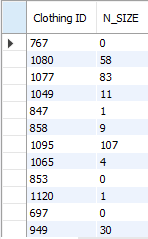

In [ ]:
# 사이즈 타입을 추가하여 집계
SELECT `Clothing ID`, SUM(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) N_SIZE_T,
SUM(CASE WHEN `Review Text` LIKE '%SIZE%' THEN 1 ELSE 0 END) / SUM(1) N_SIZE,
SUM(CASE WHEN `Review Text` LIKE '%LARGE%' THEN 1 ELSE 0 END) / SUM(1) N_LARGE,
SUM(CASE WHEN `Review Text` LIKE '%LOOSE%' THEN 1 ELSE 0 END) / SUM(1) N_LOOSE,
SUM(CASE WHEN `Review Text` LIKE '%SMALL%' THEN 1 ELSE 0 END) / SUM(1) N_SMALL,
SUM(CASE WHEN `Review Text` LIKE '%TIGHT%' THEN 1 ELSE 0 END) / SUM(1) N_TIGHT
FROM dataset2
GROUP BY 1;

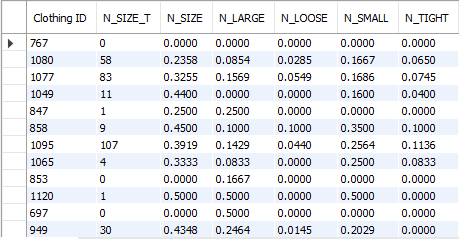

* 이제 어떤 옷이 사이즈와 관련된 Complain이 많고, 어떤 타입의 Complain이 많은지 알게 되었다.
* 타 부서와 관련 내용을 공유하도록 해당 테이블을 mydata에 SIZE_STAT이라는 이름으로 생성해보고자 한다.